<a href="https://colab.research.google.com/github/meriemdouider1/Elimination-recursive-des-fonctionnalit-s/blob/main/courbe_reponse_s4_appp_val.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import recall_score

In [ ]:
Cl = '/content/cs-longia.xlsx' 
data= pd.read_excel(Cl, sheet_name=0,header=0,index_col=False, keep_default_na=True)

In [ ]:
del data["Source"] 
del data["CodeSite"] 
data

,X_long,Y_lat,Cs_longia,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,1,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,1,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,1,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,1,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-5.366667,35

In [ ]:
X = data.loc[:, data.columns != 'Cs_longia']
Y = data.Cs_longia

In [ ]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-5.366667,35.766667,8.495770,105.550156,8.691405,15.116930,0.698221,0,0,0,0,18,30,13,0,39,0,0,1390,510,70,20,78,2,0,80,880,1950,647,153,241,0,14903,543,78,5,92,2,0,94,...,25.700001,22.100000,18.700001,16.500000,9.4,9.6,11.5,13.1,15.400000,18.500000,21.200001,21.700001,19.700001,16.100000,12.800000,10.5,1.09,1.14,1.20,1.27,1.47,1.74,1.96,2.07,1.93,1.65,1.35,1.19,4.1,4.6,4.6,4.3,4.1,3.9,3.9,4.1,4.0,4.0,4.0,4.2
250,-5.816667,35.783333,0.000000,0.000000,0.000000,0.000000,1.725019,0,0,0,0,0,0,0,0,0,0,100,2050,640,0,10,92,0,0,92,1400,2690,593,254,146,0,14838,478,42,1,94,1,0,95,...,25.700001,22.400000,19.000000,16.100000,9.6,10.7,12.4,13.9,16.000000,19.400000,21.200001,21.700001,20.100000,16.799999,13.400000,10.5,1.10,1.15,1.21,1.28,1.48,1.73,1.97,2.05,1.92,1.64,1.37,1.21,3.7,4.3,4.6,4.1,3.8,3.7,3.7,3.7,3.3,3.6,3.8,4.0
251,-

In [ ]:
Y

0      1
1      1
2      1
3      0
4      0
      ..
249    1
250    1
251    1
252    1
253    1
Name: Cs_longia, Length: 254, dtype: int64

In [ ]:
def tp(y_true, y_pred): 
    sensibilité= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return sensibilité
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred):
    value = cohen_kappa_score(y_true,y_pred) 
    return value
my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)

In [ ]:
# split into train test sets
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.20)

In [ ]:
X_train

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
92,-6.791708,33.878230,5.773937,242.339310,0.168046,43.295464,2.468886,0,0,0,0,0,0,0,0,100,0,0,2340,1020,70,90,78,0,1,79,1280,3260,709,347,162,10,15138,638,73,38,92,1,0,93,...,26.799999,23.700001,20.200001,17.799999,6.3,7.3,8.6,9.9,12.1,15.000000,18.000000,18.400000,17.000000,13.9,10.4,8.0,1.05,1.11,1.17,1.25,1.42,1.66,1.86,1.92,1.82,1.54,1.28,1.14,2.8,3.2,3.5,3.8,3.9,3.8,4.0,4.0,3.7,3.3,2.9,2.9
130,-4.630000,34.871000,13.769749,369.228180,5.996471,54.489449,0.040271,0,0,0,25,15,0,30,0,29,0,0,1630,600,170,80,79,7,1,87,930,2170,610,282,376,0,14883,694,113,25,92,2,0,94,...,22.000000,16.799999,13.300000,10.300000,-1.5,-0.8,1.6,5.4,7.6,11.300000,17.000000,16.799999,13.200000,8.0,4.5,1.5,0.68,0.71,0.74,0.82,0.95,1.09,1.19,1.26,1.18,1.02,0.85,0.76,4.2,4.5,4.1,4.4,3.6,3.5,3.3,3.1,3.3,3.6,3.9,3.7
109,-5.433000,33.363000,2.408387,84.917297,3.655222,66.820267,0.815968,0,0,0,0,0,0,0,0,100,0,0,2080,860,150,110,79,2,1,82,1370,3020,750,134,185,0,15103,728,89,27,93,1,0,94,...,26.600000,21.600000,16.600000,13.300000,-0.5,0.8,3.4,6.0,8.7,12.700000,18.799999,19.000000,15.600000,10.7,5.7,2.4,0.66,0.73,0.78,0.88,1.02,1.18,1.21,1.23,1.19,1.04,0.84,0.73,2.6,3.0,3.2,3.2,3.1,3.1,3.0,2.9,2.6,2.6,2.7,2.7
18,-9.504378,30.350920,0.000000,0.000000,0.000000,0.000000,0.467834,0,0,0,0,0,0,50,0,0,0,50,2340,520,40,30,69,0,0,69,1770,2830,636,354,148,0,15257,379,111,29,82,7,0,89,...,28.900000,26.900000,23.799999,20.600000,10.1,11.6,13.4,14.5,15.8,17.500000,17.900000,18.500000,17.700001,15.7,12.6,9.4,1.12,1.21,1.29,1.44,1.59,1.83,1.98,2.04,1.96,1.72,1.40,1.24,3.3,3.7,4.0,4.1,4.2,4.5,4.5,4.5,3.6,2.9,3.5,3.1
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.0,17.600000,19.000000,20.200001,19.600000,18.1,15.5,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,-6.727409,34.032400,0.000000,0.000000,0.000000,0.000000,2.795748,0,0,0,0,0,0,25,26,21,0,29,1740,670,40,60,88,0,1,89,1060,2390,670,197,140,0,15061,529,66,25,92,1,0,93,...,26.500000,23.600000,20.299999,17.799999,6.8,7.9,9.2,10.5,12.6,15.300000,17.799999,18.200001,16.900000,14.0,10.6,8.2,1.08,1.14,1.21,1.29,1.47,1.72,1.93,1.99,1.88,1.59,1.33,1.18,3.0,3.3,3.8,3.7,3.6,3.8,3.6,3.3,2.9,3.0,3.0,3.0
78,-6.772463,34.005190,0.000000,0.000000,0.000000,0.000000,2.635137,0,0,0,0,0,0,20,25,0,0,55,2130,740,30,90,77,0,1,78,1410,2840,699,466,150,0,15058,515,62,34,92,1,0,93,...,26.900000,24.100000,20.799999,18.299999,7.7,8.8,10.1,11.2,13.4,15.900000,18.000000,18.400000,17.299999,14.4,11.1,8.7,1.12,1.18,1.25,1.33,1.53,1.79,2.02,2.07,1.96,1.66,1.37,1.22,3.0,3.3,3.6,3.7,3.6,3.8,3.7,3.7,3.2,3.1,3.0,3.0
127,-3.002000,35.165000,2.564691,89.068779,0.559084,36.969162,0.195370,0,3,0,0,0,0,4,0,35,0,57,2040,570,10,40,87,0

# Sélection 4 

In [ ]:
feature_selected4=['Min_IRM', 'Amp1_TempJ', 'Max_TempN', 'VarT_ann_NDVI', 'Var_EVI','ProfAbs_Sub', 'IR_Moy', 'Rad_Mai', 'Tmax_Fev', 'Tmax_Avril']
X_train4=X_train[feature_selected4]
X_val4=X_val[feature_selected4]

In [ ]:
X_train4

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
92,1280,638,14558,77,90,1263,3.257812,23363,18.000000,20.700001
130,930,694,14502,7,26,958,37.281250,23362,11.500000,17.600000
109,1370,728,14651,78,93,308,4.718750,23767,15.600000,20.700001
18,1770,379,14645,52,20,2911,2.367188,23477,20.100000,23.000000
3,2930,306,14690,8,0,0,9.304688,24019,22.600000,24.600000
...,...,...,...,...,...,...,...,...,...,...
93,1060,529,14558,82,40,803,3.367188,23593,17.900000,20.500000
78,1410,515,14678,76,37,2172,15.406250,23641,17.900000,20.299999
127,1460,588,14747,77,22,448,21.921875,23602,17.700001,20.900000
214,1360,423,14658,75,14,1870,1.710938,24053,18.000000,20.299999


In [ ]:
X_val

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
11,-12.924030,27.925390,0.278829,3.630449,2.678577,3.771227,0.209659,0,100,0,0,0,0,0,0,0,0,0,4020,170,50,30,41,4,1,46,3850,4250,528,430,99,0,15150,239,114,36,64,15,1,80,...,28.000000,27.000000,25.000000,22.900000,12.8,13.7,14.6,15.8,16.700001,17.700001,17.500000,18.299999,18.400000,17.400000,15.3,13.2,1.25,1.43,1.51,1.60,1.73,1.96,2.13,2.20,2.20,2.05,1.71,1.49,3.9,3.6,3.6,4.0,4.4,4.8,4.8,5.0,4.6,3.2,3.2,3.4
244,-5.269722,35.171389,4.332951,179.077713,16.697058,13.370831,0.499593,0,10,0,1,14,0,29,0,21,0,25,2390,510,40,20,80,1,0,81,1880,2900,651,172,144,0,14956,605,77,13,93,2,0,95,...,26.100000,20.900000,17.600000,14.300000,3.4,4.3,6.7,9.1,11.700000,16.200001,20.600000,20.500000,17.400000,12.200000,8.9,5.7,0.89,0.93,0.99,1.07,1.23,1.45,1.59,1.65,1.54,1.34,1.09,0.98,3.4,3.8,3.6,3.7,3.4,3.2,3.3,3.1,3.1,3.2,3.0,3.0
252,-5.558611,35.841944,5.696193,5.641273,0.602672,4.306276,0.000000,0,0,58,0,0,0,14,12,6,11,0,1070,410,100,10,67,4,0,71,620,1530,660,193,247,0,0,0,0,0,0,0,0,0,...,25.500000,22.299999,19.200001,16.799999,8.5,8.9,10.3,11.7,13.600000,16.700001,20.400000,20.799999,19.500000,16.299999,13.3,10.8,1.12,1.17,1.23,1.31,1.52,1.79,2.03,2.12,1.98,1.67,1.39,1.22,3.9,3.9,4.6,4.0,3.8,4.1,3.7,3.4,3.6,3.6,3.4,3.6
44,-8.122984,30.713820,2.178609,22.164093,12.883797,21.918800,0.040331,0,16,9,0,0,2,46,0,27,0,0,1730,340,40,10,18,0,0,18,1420,2090,686,139,185,0,15239,571,75,14,91,2,0,93,...,29.400000,25.100000,21.200001,17.000000,3.7,5.7,8.4,10.5,13.000000,16.500000,21.000000,21.000000,17.799999,13.500000,9.6,5.4,0.69,0.75,0.80,0.89,1.01,1.15,1.18,1.23,1.22,1.08,0.88,0.77,2.5,2.9,3.0,3.4,3.2,3.5,3.9,3.9,2.9,2.5,2.3,2.6
164,-9.800000,28.430000,0.022374,4.258200,0.222421,0.181199,0.043173,0,100,0,0,0,0,0,0,0,0,0,3240,390,10,20,89,0,0,89,2830,3630,557,372,121,0,15497,452,113,8,84,5,0,89,...,31.600000,28.700001,24.200001,20.700001,7.6,9.0,11.7,14.1,16.400000,19.200001,21.900000,22.200001,20.100000,17.100000,12.7,9.1,0.90,0.97,1.05,1.20,1.32,1.54,1.59,1.64,1.64,1.48,1.18,1.02,3.8,3.9,4.5,5.3,5.5,5.6,4.5,4.5,4.6,3.7,3.1,3.8
5,-13.201560,27.165070,0.000000,0.000000,0.000000,0.000000,0.299265,0,74,0,0,0,0,0,0,0,0,26,2490,520,50,30,44,0,0,44,1920,3010,612,202,202,0,15266,299,121,23,73,12,0,85,...,29.400000,27.799999,25.299999,22.900000,12.2,13.0,14.3,14.9,15.800000,17.400000,18.900000,20.000000,19.500000,18.000000,15.4,13.0,1.20,1.34,1.44,1.53,1.65,1.87,2.06,2.14,2.12,1.98,1.63,1.41,4.3,4.5,5.1,5.6,5.8,6.2,6.6,6.3,5.7,4.6,3.8,3.9
207,-4.294673,33.471382,0.834980,34.357986,4.750886,42.935955,0.241775,0,3,0,0,0,0,51,0,46,0,0,2980,730,130,70,67,2,1,70,2070,3670,640,269,230,0,14901,656,82,23,92,1,0,93,...,23.299999,17.700001,12.700000,9.200000,-3.6,-2.1,0.9,4.5,7.600000,12.000000,17.400000,17.600000,13.700000,8.000000,3.0,-0.4,0.53,0.57,0.62,0.71,0.85,0.98,0.99,1.02,1.01,0.89,0.70,0.59,2.9,3.4,3.4,3.1,3.1,3.2,2.7,2.7,2.8,2.7,3.1,2.7
86,-7.384917,33.605960,27.173939,151.976089,0.030500,105.944191,3.302327,0,0,0,0,0,0,0,0,100,0,0,1970,930,80,100,85,1,1,87,1110,2890,704,537,144,10,15115,582,55,46,92,1,1,94,...,27.500000,24.600000,21.100000,18.600000,6.9,7.9,9.2,10.4,12.700000,15.400000,17.700001,18.200001,16.900000,14.000000,10.5,8.0,1.11,1.19,1.25,1.33,1.51,1.77,2.00,2.05,1.95,1.65,1.36,1.21,2.9,3.3,3.5,3.5

In [ ]:
X_val4

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
11,3850,239,14573,45,0,3583,1.812500,22534,22.100000,24.200001
244,1880,605,14738,74,30,1142,26.234375,23547,14.900000,19.700001
252,620,0,0,37,40,2786,14.812500,23716,17.100000,19.799999
44,1420,571,14805,25,14,3306,12.648438,23869,18.700001,23.500000
164,2830,452,14997,23,0,275,10.812500,23717,22.000000,27.000000
5,1920,299,14660,0,6,118,8.593750,24067,22.799999,24.799999
207,2070,656,14532,14,7,0,30.984375,23954,11.700000,18.299999
86,1110,582,14584,80,141,2773,20.953125,23467,18.200001,20.700001
99,1610,618,14552,66,102,2698,1.132812,23199,18.700001,22.299999
121,1980,734,14610,61,56,3304,2.492188,23815,17.400000,21.100000


In [ ]:
y_val

11     0
244    1
252    1
44     0
164    1
5      0
207    1
86     0
99     0
121    0
236    1
22     0
165    1
179    1
122    0
53     1
116    0
54     1
113    0
59     0
146    0
36     0
125    0
173    1
149    0
24     0
208    1
167    1
241    1
171    1
137    0
21     0
191    1
219    1
38     0
39     0
169    1
117    0
104    0
228    1
48     0
136    0
151    0
77     0
41     1
108    0
95     0
10     1
155    0
123    0
4      0
Name: Cs_longia, dtype: int64

In [ ]:
Classifier1 = GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1 )

In [ ]:
Classifier1.fit(X_train4,y_train)

GradientBoostingClassifier(max_depth=2, max_features=2, min_samples_leaf=2,
                           n_estimators=225, random_state=0, subsample=1)

In [ ]:
preds = Classifier1.predict(X_val4)

In [ ]:
preds

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0])

In [ ]:
cf_matrix = confusion_matrix(y_val, preds)
print(cf_matrix)

[[25  6]
 [ 6 14]]


In [ ]:
###Recall
def recall(y_val, preds):
  recall=recall_score(y_val, preds)
  return recall
def MCC(y_val, preds):
  MCC= matthews_corrcoef(y_val, preds) 
  return MCC
### MCC
def MCC(y_val, preds):
  MCC= matthews_corrcoef(y_val, preds) 
  return MCC
### sensibilite
def sensibilite(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  sensibilite =  (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  return sensibilite
### specifite 
def specifite(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  specifite =  (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  return specifite 
### kappa
def kappa(y_val, preds):
  value = cohen_kappa_score(y_val,preds)
  return value
### balancedacc
def balancedacc(y_val, preds):
  cf_matrix = confusion_matrix(y_val, preds)
  sen = (cf_matrix[1,1])/(cf_matrix[1,1]+cf_matrix[1,0])
  spe = (cf_matrix[0,0])/(cf_matrix[0,0]+cf_matrix[0,1])
  value = (sen + spe)/2
  return value
### courbe roc
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

In [ ]:
MCC(y_val, preds)

0.5064516129032258

In [ ]:
recall(y_val, preds)

0.7

In [ ]:
sensibilite(y_val, preds)

0.7

In [ ]:
specifite(y_val, preds)

0.8064516129032258

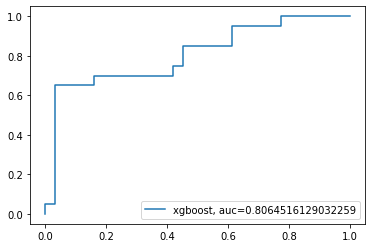

In [ ]:
y_pred_proba = Classifier1.predict_proba(X_val4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

**val**

In [ ]:
y_predict = Classifier1.predict(X_val4)

In [ ]:
y_predict

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0])

In [ ]:
y_predict_proba = Classifier1.predict_proba(X_val4)

In [ ]:
y_predict_proba

array([[0.00651567, 0.99348433],
       [0.20750573, 0.79249427],
       [0.91549209, 0.08450791],
       [0.82453534, 0.17546466],
       [0.07959408, 0.92040592],
       [0.96129268, 0.03870732],
       [0.15959512, 0.84040488],
       [0.95375775, 0.04624225],
       [0.33210497, 0.66789503],
       [0.43145003, 0.56854997],
       [0.06856292, 0.93143708],
       [0.85512974, 0.14487026],
       [0.02652578, 0.97347422],
       [0.02467925, 0.97532075],
       [0.70476613, 0.29523387],
       [0.87509327, 0.12490673],
       [0.59563697, 0.40436303],
       [0.87509327, 0.12490673],
       [0.35851607, 0.64148393],
       [0.72183572, 0.27816428],
       [0.35159466, 0.64840534],
       [0.72715129, 0.27284871],
       [0.85282391, 0.14717609],
       [0.00824874, 0.99175126],
       [0.56022068, 0.43977932],
       [0.94118008, 0.05881992],
       [0.72303139, 0.27696861],
       [0.09220008, 0.90779992],
       [0.02451009, 0.97548991],
       [0.00535654, 0.99464346],
       [0.

In [ ]:
y_predict_proba[::,0]

array([0.00651567, 0.20750573, 0.91549209, 0.82453534, 0.07959408,
       0.96129268, 0.15959512, 0.95375775, 0.33210497, 0.43145003,
       0.06856292, 0.85512974, 0.02652578, 0.02467925, 0.70476613,
       0.87509327, 0.59563697, 0.87509327, 0.35851607, 0.72183572,
       0.35159466, 0.72715129, 0.85282391, 0.00824874, 0.56022068,
       0.94118008, 0.72303139, 0.09220008, 0.02451009, 0.00535654,
       0.88815565, 0.68184914, 0.72797025, 0.05226598, 0.71471719,
       0.71471719, 0.01496135, 0.87716062, 0.8987673 , 0.77625636,
       0.31361903, 0.88815565, 0.88080129, 0.93856209, 0.35912531,
       0.87198165, 0.84288713, 0.05525416, 0.96862596, 0.95547944,
       0.98403254])

In [ ]:
y_predict_proba[::,1]

array([0.99348433, 0.79249427, 0.08450791, 0.17546466, 0.92040592,
       0.03870732, 0.84040488, 0.04624225, 0.66789503, 0.56854997,
       0.93143708, 0.14487026, 0.97347422, 0.97532075, 0.29523387,
       0.12490673, 0.40436303, 0.12490673, 0.64148393, 0.27816428,
       0.64840534, 0.27284871, 0.14717609, 0.99175126, 0.43977932,
       0.05881992, 0.27696861, 0.90779992, 0.97548991, 0.99464346,
       0.11184435, 0.31815086, 0.27202975, 0.94773402, 0.28528281,
       0.28528281, 0.98503865, 0.12283938, 0.1012327 , 0.22374364,
       0.68638097, 0.11184435, 0.11919871, 0.06143791, 0.64087469,
       0.12801835, 0.15711287, 0.94474584, 0.03137404, 0.04452056,
       0.01596746])

In [ ]:
X_val4

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
11,3850,239,14573,45,0,3583,1.812500,22534,22.100000,24.200001
244,1880,605,14738,74,30,1142,26.234375,23547,14.900000,19.700001
252,620,0,0,37,40,2786,14.812500,23716,17.100000,19.799999
44,1420,571,14805,25,14,3306,12.648438,23869,18.700001,23.500000
164,2830,452,14997,23,0,275,10.812500,23717,22.000000,27.000000
5,1920,299,14660,0,6,118,8.593750,24067,22.799999,24.799999
207,2070,656,14532,14,7,0,30.984375,23954,11.700000,18.299999
86,1110,582,14584,80,141,2773,20.953125,23467,18.200001,20.700001
99,1610,618,14552,66,102,2698,1.132812,23199,18.700001,22.299999
121,1980,734,14610,61,56,3304,2.492188,23815,17.400000,21.100000


In [ ]:
X_val["Min_IRM"]

11     3850
244    1880
252     620
44     1420
164    2830
5      1920
207    2070
86     1110
99     1610
121    1980
236    1040
22     1090
165    3990
179    3360
122    1650
53     1720
116    1510
54     1720
113     920
59     1010
146    1120
36     1990
125    1290
173    3550
149    1170
24     1230
208    1380
167    2460
241    1350
171    2940
137    1210
21     1770
191    1520
219    2790
38     2420
39     2420
169    3960
117    1280
104    1980
228    1190
48     1840
136    1250
151    2750
77     1090
41     2560
108    1250
95     2140
10     3190
155    1980
123    1680
4      2350
Name: Min_IRM, dtype: int64

In [ ]:
d = {'Cs_longia': y_val, 'predict': y_predict , 'predict0': y_predict_proba[::,0], 'predict1': y_predict_proba[::,1],"Min_IRM":X_val4["Min_IRM"], 'Amp1_TempJ':X_val4['Amp1_TempJ'], 'Max_TempN':X_val4['Max_TempN'], 'VarT_ann_NDVI':X_val4['VarT_ann_NDVI'], 'Var_EVI':X_val4['Var_EVI'],'ProfAbs_Sub':X_val4['ProfAbs_Sub'], 'IR_Moy':X_val4['IR_Moy'], 'Rad_Mai':X_val4['Rad_Mai'], 'Tmax_Fev':X_val4['Tmax_Fev'], 'Tmax_Avril':X_val4['Tmax_Avril']}

In [ ]:
df = pd.DataFrame(data=d)
df

,Cs_longia,predict,predict0,predict1,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
11,0,1,0.006516,0.993484,3850,239,14573,45,0,3583,1.812500,22534,22.100000,24.200001
244,1,1,0.207506,0.792494,1880,605,14738,74,30,1142,26.234375,23547,14.900000,19.700001
252,1,0,0.915492,0.084508,620,0,0,37,40,2786,14.812500,23716,17.100000,19.799999
44,0,0,0.824535,0.175465,1420,571,14805,25,14,3306,12.648438,23869,18.700001,23.500000
164,1,1,0.079594,0.920406,2830,452,14997,23,0,275,10.812500,23717,22.000000,27.000000
5,0,0,0.961293,0.038707,1920,299,14660,0,6,118,8.593750,24067,22.799999,24.799999
207,1,1,0.159595,0.840405,2070,656,14532,14,7,0,30.984375,23954,11.700000,18.299999
86,0,0,0.953758,0.046242,1110,582,14584,80,141,2773,20.953125,23467,18.200001,20.700001
99,0,1,0.332105,0.667895,1610,618,14552,66,102,2698,1.132812,23199,18.700001,22.299999
121,0,1,0.431450,0.568550,1980,734,14610,61,56,3304,2.492188,23815,17.400000,21.100000


In [ ]:
df.to_excel(r'df.xlsx', index = False)

**appp**

In [ ]:
X_train4

,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
92,1280,638,14558,77,90,1263,3.257812,23363,18.000000,20.700001
130,930,694,14502,7,26,958,37.281250,23362,11.500000,17.600000
109,1370,728,14651,78,93,308,4.718750,23767,15.600000,20.700001
18,1770,379,14645,52,20,2911,2.367188,23477,20.100000,23.000000
3,2930,306,14690,8,0,0,9.304688,24019,22.600000,24.600000
...,...,...,...,...,...,...,...,...,...,...
93,1060,529,14558,82,40,803,3.367188,23593,17.900000,20.500000
78,1410,515,14678,76,37,2172,15.406250,23641,17.900000,20.299999
127,1460,588,14747,77,22,448,21.921875,23602,17.700001,20.900000
214,1360,423,14658,75,14,1870,1.710938,24053,18.000000,20.299999


In [ ]:
y_predictapp = Classifier1.predict(X_train4)

In [ ]:
y_predictapp

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0])

In [ ]:
MCC(y_train, y_predictapp)

0.931350303436513

In [ ]:
recall(y_train, y_predictapp)

0.9532710280373832

In [ ]:
sensibilite(y_train, y_predictapp)

0.9532710280373832

In [ ]:
specifite(y_train, y_predictapp)

0.9791666666666666

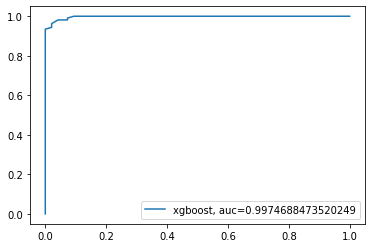

In [ ]:
y_pred_proba_app = Classifier1.predict_proba(X_train4)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, y_pred_proba_app)
auc = metrics.roc_auc_score(y_train, y_pred_proba_app)
plt.plot(fpr,tpr,label="xgboost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
y_predictapp_proba = Classifier1.predict_proba(X_train4)

In [ ]:
y_predictapp_proba

array([[0.92363394, 0.07636606],
       [0.94527313, 0.05472687],
       [0.80406072, 0.19593928],
       [0.68184914, 0.31815086],
       [0.74128303, 0.25871697],
       [0.77323728, 0.22676272],
       [0.68184914, 0.31815086],
       [0.0519583 , 0.9480417 ],
       [0.5567971 , 0.4432029 ],
       [0.9453972 , 0.0546028 ],
       [0.87103688, 0.12896312],
       [0.07113154, 0.92886846],
       [0.06210683, 0.93789317],
       [0.25190371, 0.74809629],
       [0.80782882, 0.19217118],
       [0.90159993, 0.09840007],
       [0.9190965 , 0.0809035 ],
       [0.07064256, 0.92935744],
       [0.98748112, 0.01251888],
       [0.91900968, 0.08099032],
       [0.88137268, 0.11862732],
       [0.93508767, 0.06491233],
       [0.94543493, 0.05456507],
       [0.01217145, 0.98782855],
       [0.15393386, 0.84606614],
       [0.56712781, 0.43287219],
       [0.86919835, 0.13080165],
       [0.2969565 , 0.7030435 ],
       [0.88815565, 0.11184435],
       [0.47366531, 0.52633469],
       [0.

In [ ]:
y_predictapp_proba[::,0]

array([0.92363394, 0.94527313, 0.80406072, 0.68184914, 0.74128303,
       0.77323728, 0.68184914, 0.0519583 , 0.5567971 , 0.9453972 ,
       0.87103688, 0.07113154, 0.06210683, 0.25190371, 0.80782882,
       0.90159993, 0.9190965 , 0.07064256, 0.98748112, 0.91900968,
       0.88137268, 0.93508767, 0.94543493, 0.01217145, 0.15393386,
       0.56712781, 0.86919835, 0.2969565 , 0.88815565, 0.47366531,
       0.07343869, 0.15766082, 0.06271425, 0.02367158, 0.05727333,
       0.08047802, 0.74627025, 0.68370064, 0.11857122, 0.24447354,
       0.03687465, 0.8420669 , 0.69338164, 0.82324359, 0.04381027,
       0.89225322, 0.88725581, 0.29649739, 0.06210683, 0.00563486,
       0.77066576, 0.83280011, 0.76746661, 0.75716919, 0.72212848,
       0.5690748 , 0.94238547, 0.31190594, 0.90112919, 0.76992349,
       0.73061179, 0.11856263, 0.09957219, 0.13889095, 0.81431011,
       0.08141519, 0.86945318, 0.91968113, 0.12906356, 0.11744032,
       0.92255852, 0.91900968, 0.06635231, 0.08226258, 0.61540

In [ ]:
y_predictapp_proba[::,1]

array([0.07636606, 0.05472687, 0.19593928, 0.31815086, 0.25871697,
       0.22676272, 0.31815086, 0.9480417 , 0.4432029 , 0.0546028 ,
       0.12896312, 0.92886846, 0.93789317, 0.74809629, 0.19217118,
       0.09840007, 0.0809035 , 0.92935744, 0.01251888, 0.08099032,
       0.11862732, 0.06491233, 0.05456507, 0.98782855, 0.84606614,
       0.43287219, 0.13080165, 0.7030435 , 0.11184435, 0.52633469,
       0.92656131, 0.84233918, 0.93728575, 0.97632842, 0.94272667,
       0.91952198, 0.25372975, 0.31629936, 0.88142878, 0.75552646,
       0.96312535, 0.1579331 , 0.30661836, 0.17675641, 0.95618973,
       0.10774678, 0.11274419, 0.70350261, 0.93789317, 0.99436514,
       0.22933424, 0.16719989, 0.23253339, 0.24283081, 0.27787152,
       0.4309252 , 0.05761453, 0.68809406, 0.09887081, 0.23007651,
       0.26938821, 0.88143737, 0.90042781, 0.86110905, 0.18568989,
       0.91858481, 0.13054682, 0.08031887, 0.87093644, 0.88255968,
       0.07744148, 0.08099032, 0.93364769, 0.91773742, 0.38459

In [ ]:
d1 = {'Cs_longia': y_train, 'predict': y_predictapp , 'predict0': y_predictapp_proba[::,0], 'predict1': y_predictapp_proba[::,1],"Min_IRM":X_train4["Min_IRM"], 'Amp1_TempJ':X_train4['Amp1_TempJ'], 'Max_TempN':X_train4['Max_TempN'], 'VarT_ann_NDVI':X_train4['VarT_ann_NDVI'], 'Var_EVI':X_train4['Var_EVI'],'ProfAbs_Sub':X_train4['ProfAbs_Sub'], 'IR_Moy':X_train4['IR_Moy'], 'Rad_Mai':X_train4['Rad_Mai'], 'Tmax_Fev':X_train4['Tmax_Fev'], 'Tmax_Avril':X_train4['Tmax_Avril']}

In [ ]:
dfapp = pd.DataFrame(data=d1)
dfapp

,Cs_longia,predict,predict0,predict1,Min_IRM,Amp1_TempJ,Max_TempN,VarT_ann_NDVI,Var_EVI,ProfAbs_Sub,IR_Moy,Rad_Mai,Tmax_Fev,Tmax_Avril
92,0,0,0.923634,0.076366,1280,638,14558,77,90,1263,3.257812,23363,18.000000,20.700001
130,0,0,0.945273,0.054727,930,694,14502,7,26,958,37.281250,23362,11.500000,17.600000
109,0,0,0.804061,0.195939,1370,728,14651,78,93,308,4.718750,23767,15.600000,20.700001
18,0,0,0.681849,0.318151,1770,379,14645,52,20,2911,2.367188,23477,20.100000,23.000000
3,0,0,0.741283,0.258717,2930,306,14690,8,0,0,9.304688,24019,22.600000,24.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,0,0.867445,0.132555,1060,529,14558,82,40,803,3.367188,23593,17.900000,20.500000
78,0,0,0.843824,0.156176,1410,515,14678,76,37,2172,15.406250,23641,17.900000,20.299999
127,0,0,0.897537,0.102463,1460,588,14747,77,22,448,21.921875,23602,17.700001,20.900000
214,1,1,0.048522,0.951478,1360,423,14658,75,14,1870,1.710938,24053,18.000000,20.299999


In [ ]:
dfapp.to_excel(r'dfapp.xlsx', index = False)

In [ ]:
cf_matrix1 = confusion_matrix(y_train, y_predictapp)
print(cf_matrix1)

[[ 94   2]
 [  5 102]]
